   ## Machine learning. Practical task 1

   Importing libraries

In [1]:
import matplotlib.pyplot as pl
import pandas as pd

## Downloading the dataset

In [2]:
dataf = pd.read_csv("adult.data", names=["age", "workclass", "fnlwgt", "education", "education-num",
                                     "marital-status", "occupation", "relationship",
                                     "race", "sex", "capital-gain", "capital-loss", "hours-per-week",
                                     "native-country", "predicted-salary"])

In [3]:
dataf.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predicted-salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Step 1. How many males and females are there?

In [4]:
dataf["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

## Step 2. What is the mean male age?

In [5]:
dataf.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
predicted-salary    object
dtype: object

In [6]:
dataf[dataf["sex"].str.strip().str.match("Male")]["age"].mean()

39.43354749885268

## Step 3. What is the proportion of the US citizens?

In [7]:
len(dataf[dataf["native-country"].str.strip().str.match("United-States")]) / len(dataf)

0.895857006848684

## Step 4. Plot the distribution of people’s education as a bar plot.

<BarContainer object of 16 artists>

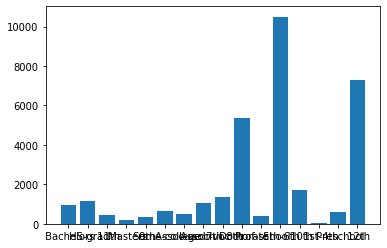

In [8]:
grps = dataf["education"].unique()
vals = dataf.groupby("education")["sex"].count()
pl.bar(grps, vals)

## Step 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [9]:
dataf[dataf["marital-status"].str.strip().str.match("Divorced")]["fnlwgt"].describe()

count    4.443000e+03
mean     1.858028e+05
std      1.056468e+05
min      1.941000e+04
25%      1.155825e+05
50%      1.753700e+05
75%      2.310475e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

## Step 6. Is it true that the people who receive over 50k are mostly highly educated?

In [10]:
df = pd.DataFrame(dataf[dataf["predicted-salary"].str.strip().str.match(">50K")]["education"]
                  .value_counts().reset_index(name="count"))
df.columns = ["education", "count"]

<BarContainer object of 15 artists>

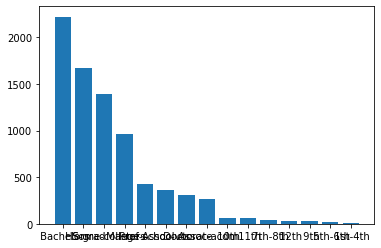

In [11]:
pl.bar(df["education"], df["count"])

## Step 7. What is the maximum male and female age for each race?

In [12]:
dataf.groupby(["race","sex"])["age"].max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

## Step 8. The people from which countries work as farmers/fishers?

In [13]:
d_frame = dataf[dataf["occupation"].str.strip().str.match("Farming-fishing")].groupby(
    "native-country").count().iloc[:, :1]
d_frame.columns = ["count"]
d_frame

,count
native-country,
?,5
Cambodia,1
Canada,2
Cuba,2
El-Salvador,2
England,1
France,1
Germany,1
Guatemala,4


## Step 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [14]:
dataf[dataf["education"].str.strip().str.match("Bachelors")].groupby("sex").education.count() / \
          dataf[dataf["education"].str.strip().str.match("Masters")].groupby("sex").education.count()

sex
 Female    3.020522
 Male      3.147430
Name: education, dtype: float64

## Step 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [15]:
work_h = dataf["hours-per-week"].max()
work_h

99

In [16]:
workers = pd.DataFrame(dataf[dataf["hours-per-week"] == work_h]["predicted-salary"]).reset_index()
workers.groupby("predicted-salary")["index"].count()

predicted-salary
 <=50K    60
 >50K     25
Name: index, dtype: int64

In [17]:
len(workers)

85